In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import copy
#%matplotlib inline

In [ ]:
k=[1,1]
j=[2,2]

print(np.add(j,[-1,-1]))

[1 1]


* Iteracion 1   - Vector: [1.4581497797356828, -2.2202643171806167]   - F(V): 2.4933920704845836 - Lambda 0.22026431718061673  -Error 2.1490832700712903
* Iteracion 2   - Vector: [1.298771533970846, -1.1046165968267607]   - F(V): 0.9312044192653683 - Lambda 0.4065040650406505  -Error 0.06452591981766259
* Iteracion 3   - Vector: [0.8613589916294667, -1.1671041028755293]   - F(V): 0.4880222844812505 - Lambda 0.22026431718061668  -Error 0.25637895893699725
* Iteracion 4   - Vector: [0.8161444547323902, -0.8506023445959947]   - F(V): 0.3622944921519995 - Lambda 0.40650406504065073  -Error 0.004416181027201452
* Iteracion 5   - Vector: [0.692053456992837, -0.8683296299873595]   - F(V): 0.32662636267812717 - Lambda 0.22026431718061665  -Error 0.061327506030639425
* Iteracion 6   - Vector: [0.6792263968316057, -0.7785402088587398]   - F(V): 0.31650755412676657 - Lambda 0.40650406504065006  -Error 0.0003357340233661487
* Iteracion 7   - Vector: [0.6440226149794156, -0.7835693205519098]   - F(

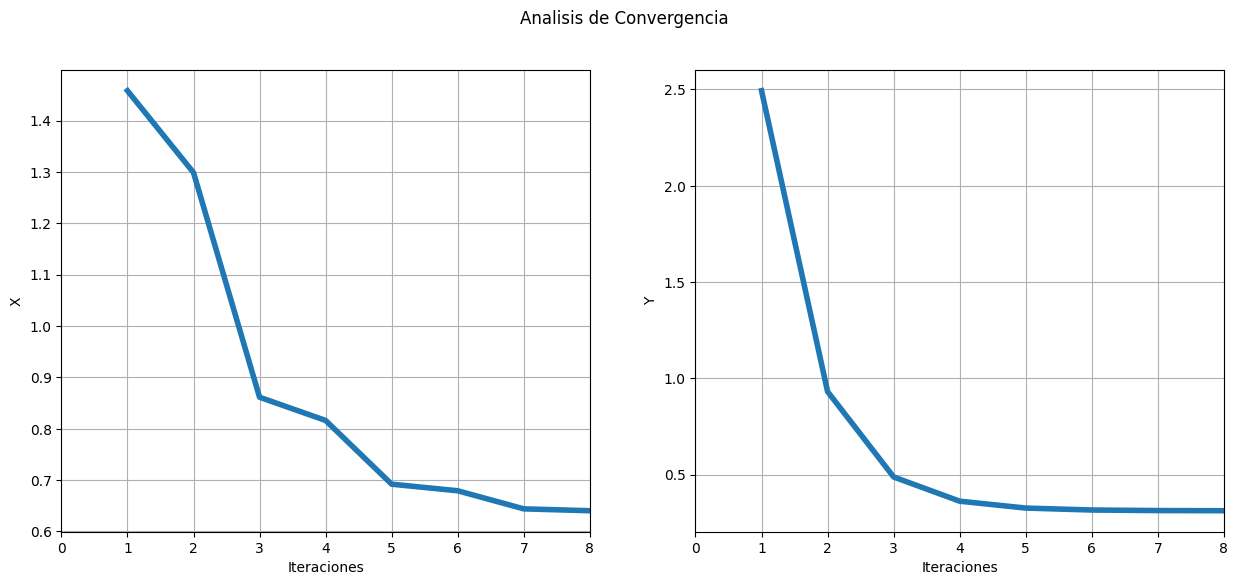

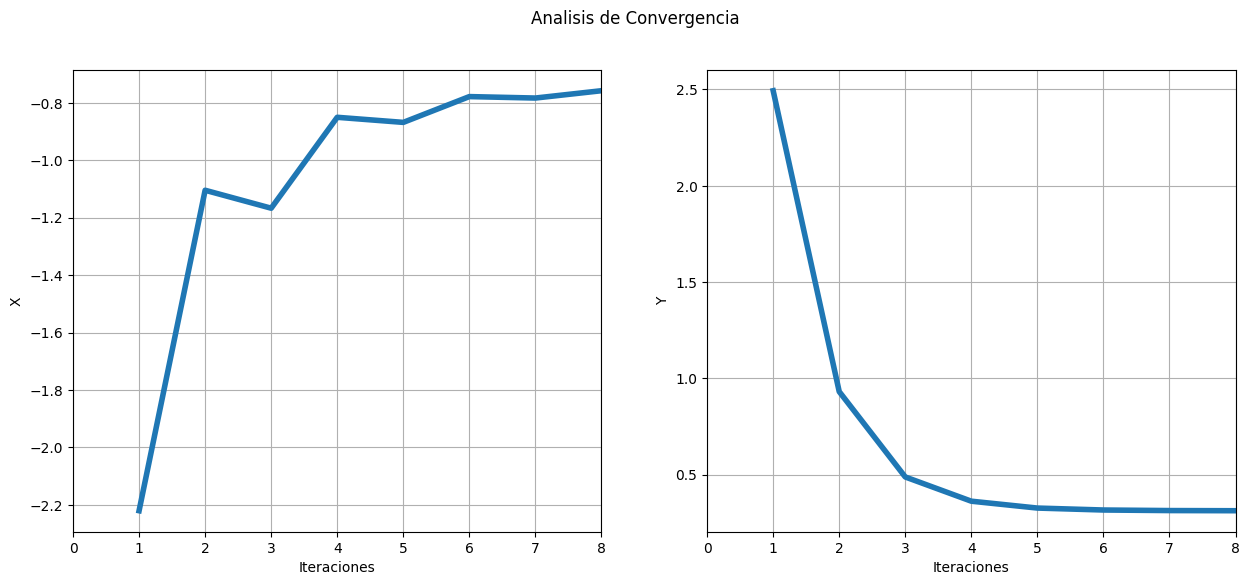

In [ ]:
IterMax=50
vector=[3,-2]


#Function Mod
numvar=2
x=sympy.symbols('x')
y=sympy.symbols('y')
namevar=['x','y']

A=[[4,2],[2,3]]
Ainv=[[3/8,-1/4],[-1/4,1/2]]
c=1
#f=100*(y-x**2)**2-(1-x)**2
f=2*x**2+2*x*y+(3/2)*y**2-x+y+c



Error=100
Contador=0
Registrox=[]
Registroy=[]


#Obtencion Ek
Ek=np.add(vector,[-0.6251540407538414, 0.7499715052545071])

while(Error>0.0001 and Contador<IterMax):

  #Evaluamos gradiente en el vector
  EvalGrad=Gradiente(vector)
  #Obtenemos Lambda deseada
  Lb=np.matmul(EvalGrad,np.matmul(A,EvalGrad))
  Lu=np.matmul(EvalGrad,EvalGrad)
  Lambda=Lu/Lb

  #Sacamos al nuevo vector
  for i in range(0,numvar):
    vector[i]=vector[i]+Lambda*EvalGrad[i]

  #Obtenemos el evaluado del vector
  Fev=f
  for i in range(0,numvar):
    Fev=Fev.subs(namevar[i],vector[i])
  TF=float(Fev)


  #Calculo de Error
  #Ek=np.matmul(Ainv,EvalGrad)
  #Error=NormaPesadaCuadrada(Ek,A)


  Ek1=np.add(Ek,np.multiply(EvalGrad,-Lambda))
  Error=np.abs((NormaPesadaCuadrada(Ek,A)-NormaPesadaCuadrada(Ek1,A))/NormaPesadaCuadrada(Ek,A))


  Ek=Ek1

  #Agregamos a registro
  Contador+=1
  Registrox.append([Contador,vector[0],TF])
  Registroy.append([Contador,vector[1],TF])
  print("* Iteracion",Contador,"  - Vector:",vector,"  - F(V):",float(TF), "- Lambda",Lambda, " -Error",Error)

Evaluacion(Registrox)
Evaluacion(Registroy)




In [ ]:
def NormaPesadaCuadrada(Error,A):
  Error=np.matmul(Error,np.matmul(A,Error))

  return Error

In [ ]:
def Gradiente(vector):

    grad=[]
    #Creacion Gradiente
    for i in range (0,numvar):
        g=-1*sympy.diff(f,namevar[i])
        grad.append(g)

    #evaluacion del gradiente en los puntos
    for i in range(0,numvar):
      for j in range(0,numvar):
        grad[i]=grad[i].subs(namevar[j],vector[j])
    #convertir a float
    for i in range(0,numvar):
      grad[i]=float(grad[i])


    return grad

In [ ]:
#Evalua los registros dados de los metodos
def Evaluacion(Registro):
  #Conversion para facilitar la graficacion
  Registro=np.array(Registro)

  fig, axs=plt.subplots(1,2,figsize=(15,6))
  #Ponemos titulo
  fig.suptitle('Analisis de Convergencia')
  #Primera Grafica
  axs[0].plot(Registro[:,0],Registro[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('X')
  axs[0].grid()
  axs[0].set_xlim([0,len(Registro)])
  #Segunda Grafica
  axs[1].plot(Registro[:,0],Registro[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Y')
  axs[1].grid()
  axs[1].set_xlim([0,len(Registro)])
  #Mostramos las graficas
  plt.show()